<a href="https://colab.research.google.com/github/dipucriodigital/ciencia-de-dados-e-analytics/blob/main/advanced-analytics/estimativa_de_pose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vamos utilizar o modelo PoseNet desenvolvido pelo google para detectar poses em imagens ou vídeos. Primeiramente vamos fazer o download do repositório que iremos usar. 

Este repositório contém um port para Pytorch baseado na versão do modelo em Tensorflow (https://github.com/rwightman/posenet-python).

In [ ]:
import os
from os.path import exists, join, basename, splitext

!git clone https://github.com/rwightman/posenet-pytorch.git

fatal: destination path 'posenet-pytorch' already exists and is not an empty directory.


# Download de imagens de teste

Aqui faremos o download de uma imagem de teste e a salvaremos em um pasta

In [ ]:
!mkdir images
!wget https://media.self.com/photos/57d8b8874b76f0f832a0ecff/master/w_1600,c_limit/running-marathon-data.jpg -O ./images/1.jpg
#!wget https://freedesignfile.com/upload/2018/10/Stock-Photo-Girl-dancing-dance-01.jpg -O ./images/2.jpg

mkdir: cannot create directory ‘images’: File exists
--2022-11-19 17:02:41--  https://media.self.com/photos/57d8b8874b76f0f832a0ecff/master/w_1600,c_limit/running-marathon-data.jpg
Resolving media.self.com (media.self.com)... 151.101.0.239, 151.101.64.239, 151.101.128.239, ...
Connecting to media.self.com (media.self.com)|151.101.0.239|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73452 (72K) [image/jpeg]
Saving to: ‘./images/1.jpg’

./images/1.jpg      100%[===================>]  71.73K  --.-KB/s    in 0.01s   

2022-11-19 17:02:41 (5.81 MB/s) - ‘./images/1.jpg’ saved [73452/73452]

--2022-11-19 17:02:41--  https://freedesignfile.com/upload/2018/10/Stock-Photo-Girl-dancing-dance-01.jpg
Resolving freedesignfile.com (freedesignfile.com)... 172.67.72.28, 104.26.3.193, 104.26.2.193
Connecting to freedesignfile.com (freedesignfile.com)|172.67.72.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57855 (56K) [image/jpeg]
Saving to: ‘./im

Vamos instanciar nosso modelo da PoseNet. Ela possui 4 verões diferentes de implementação: 50, 75, 100 e 101 cujo números são referêntes à profundidade da rede. Vamos usar a versão 101.

In [ ]:
#%cd posenet-pytorch
import cv2
import time
import argparse
import os
import torch
import posenet
import cv2
from google.colab.patches import cv2_imshow
model = posenet.load_model(101)
output_stride = model.output_stride

#vamos ler as imagens que possuímos
filenames = [f.path for f in os.scandir("../images") if f.is_file() and f.path.endswith(('.png', '.jpg'))]



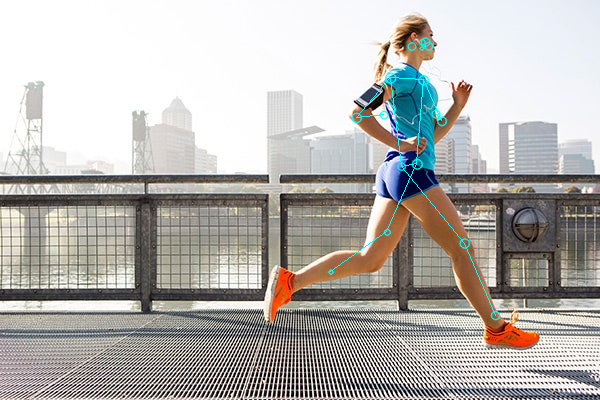

In [ ]:
#fator de escala das imagens
scale_factor = 0.5
for f in filenames:
        #modelo de leitura da imagem
        input_image, draw_image, output_scale = posenet.read_imgfile(
            f, scale_factor=scale_factor, output_stride=output_stride)

        with torch.no_grad():
            input_image = torch.Tensor(input_image)
            #o modelo nos dá como retorno uma série de mapas de calor e resultados em múltipas escalas
            heatmaps_result, offsets_result, displacement_fwd_result, displacement_bwd_result = model(input_image)

            #vamos detectar de fato a pose e a posição de cada articulação baseada em um score associado
            pose_scores, keypoint_scores, keypoint_coords = posenet.decode_multiple_poses(
                heatmaps_result.squeeze(0),
                offsets_result.squeeze(0),
                displacement_fwd_result.squeeze(0),
                displacement_bwd_result.squeeze(0),
                output_stride=output_stride,
                max_pose_detections=10,
                min_pose_score=0.25)

        keypoint_coords *= output_scale

        #vamos desenhar a pose sobre a imagem
        draw_image = posenet.draw_skel_and_kp(
              draw_image, pose_scores, keypoint_scores, keypoint_coords,
              min_pose_score=0.25, min_part_score=0.25)
        
        cv2_imshow(draw_image)

#Exercício 1: Melhorando o detector

Neste exercício queremos melhorar o desempenho do nosso detector de pose e aplicar algumas das técnicas para melhorar a performance.



Crie uma rede mais leve e teste o seu desempenho. Altere a rede de 101 para uma das outras versões. Como isto afeta o modelo da PoseNet?

Altere o fator de escala e verifique a influência nas detecções.

Como podemos alterar este modelo para considerar vídeos?
Caso necessário consulte como podemos inserir vídeos: https://colab.research.google.com/github/tugstugi/dl-colab-notebooks/blob/master/notebooks/OpenPose.ipynb